<a href="https://colab.research.google.com/github/karldeguzman32/CpE-AIML/blob/main/58034_Lab03_Pyrates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 1: Simple Linear Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Create a class named `LinearRegression_Simple()` wherein it can compute for the linear regression for a single variable. The class will be required to have the following helper methods:
> 1. `covariance(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the covariance between the two input vectors (scalar) 
> 2. `pearsons_R(vectA, vectB)`
>> input: 2 single-dimension vectors
>>
>> output: the correlation between the two input vectors (scalar)
> 3. `train(X, y)`
>> input: 2 single-dimension vectors
>>
>> output: the weights of the linear regressor.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should accept both scalar and vector values.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication.
> 5. `evaluate()`
>> input: 
>>
>> output: a `dictionary` that displays the SST, SSR, SST, MSE, RMSE, R-squared, and the Adjusted R-squared of the model. Note: You should use the `predict()` method here.
> 5. `visualize()`
>> input: *none*
>>
>> output: a visualization of the linear regressor over the input dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
## No other packages or libraries can be added in this cell

In [ ]:
### YOUR CODE HERE
class LinearRegression_Simple():

  ### Program the required methods
  def covariance(self, vectA, vectB):
    N = np.size(vectA)
    x_mean = vectA.mean()
    y_mean = vectB.mean()

    sst_x = vectA - x_mean
    sst_y = vectB - y_mean
    self.covar = (sum(sst_x[i]*sst_y[i] for i in range(len(vectA))))/(N-1)
    return self.covar

  def pearsons_r(self, vectA, vectB):
    x_mean = vectA.mean()
    y_mean = vectB.mean()
    sst_x = vectA - x_mean
    sst_y = vectB - y_mean

    sst_x_squared = np.square(sst_x)
    sst_y_squared = np.square(sst_y)

    nume = sum(sst_x[i]*sst_y[i] for i in range(len(vectA)))
    deno = np.sqrt((sum(sst_x_squared[i] for i in range(len(vectA))))*(sum(sst_y_squared[i] for i in range(len(vectA)))))

    self.m = nume / deno
    return self.m

  def train(self, X, y):
    r = np.corrcoef(X,y)[0, 1]
    std_y = np.std(y)
    std_X = np.std(X)
    self.w1 = r*(std_y/std_X)
    
    y_mean = np.mean(y)
    X_mean = np.mean(X)
    self.w0 = y_mean - (self.w1*X_mean)
    return print(f"w1: {self.w1}, w0: {self.w0}")

  def predict(self, x):
    self.pred_value = (x*self.w1) + self.w0 
    index = np.array(list(range(0, self.pred_value.size)))
    return print('\u0177 =', self.pred_value, ",i = ", index)

  def evaluate(self):
    SST = np.sum(np.square(y - y.mean()))
    SSR = np.sum(np.square(self.pred_value - y.mean()))
    SSE = np.sum(np.square(self.pred_value - y[0:5]))
    MSE = np.mean(np.square(self.pred_value - y[0:5]))
    RMSE = np.sqrt(MSE)
    R_squared = 1 - (SSE/SST)

    n = len(y)
    k = 1
    AdjR_squared = 1 - (1-R_squared)*((n-1)/(n-k-1))

    perf = {"SST": SST, "SSR": SSR, "SSE": SSE, "MSE": MSE, "RMSE": RMSE, "R-squared": R_squared, "Adjust R-Squared": AdjR_squared}
    return perf

  def visualize(self):
    plt.figure(figsize=(10,10))
    plt.grid()
    plt.scatter(X[0:self.pred_value.size], y[0:self.pred_value.size])
    plt.plot(X[0:self.pred_value.size], self.pred_value, color='red')
    return plt.show()


  ### You may add other helper functions in to make your code cleaner

In [ ]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL

np.random.seed(123)
X = np.arange(0,100,1,dtype=np.float64) ## features
m = np.random.uniform(0.3,0.8,(100,)) ## weights
b = np.random.uniform(8,10,(100,)) ## biases
y = -m*X-b  ## targets
X_test = np.arange(100,300,1,dtype=np.float64)

In [ ]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = LinearRegression_Simple()

In [ ]:
## TEST #2 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
cov = regressor.covariance(X,y)
cov

-456.66330121164833

Expected output value:
$$cov_{x,y} = -456.66$$

In [ ]:
## TEST #3 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
r = regressor.pearsons_r(X,y)
r

-0.9050803915258334

Expected output value:
$$r = -0.90$$

In [ ]:
## TEST #4 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X,y)
#regressor.model_

w1: -0.5425702588653248, w0: -9.378797103736634


Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_0\end{bmatrix} = \begin{bmatrix}-0.54 \\ -9.38\end{bmatrix}$$

In [ ]:
## TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test[:5])
preds

ŷ = [-63.63582299 -64.17839325 -64.72096351 -65.26353377 -65.80610403] ,i =  [0 1 2 3 4]


Expected output value:
$$\hat{y}_i = \begin{bmatrix} -63.64 \\ -64.18 \\ -64.72 \\ -65.26 \\ -65.81 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [ ]:
## TEST #6 (Max pts: 30)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

{'Adjust R-Squared': 0.49158237791544657,
 'MSE': 3014.077744872599,
 'R-squared': 0.49671790945165417,
 'RMSE': 54.900616980800855,
 'SSE': 15070.388724362994,
 'SSR': 4059.9024573607667,
 'SST': 29944.21817780801}

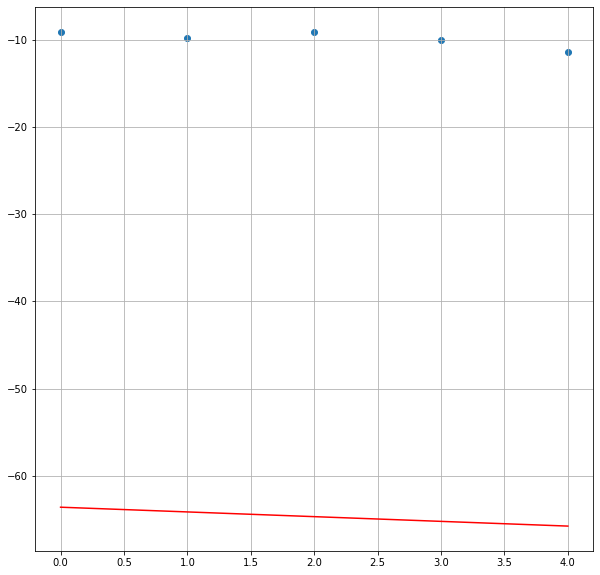

In [ ]:
## TEST #7 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize()